In [1]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sdmetrics

Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
#plt.title('테스트')

In [2]:
import pandas as pd
import numpy as np
from table_evaluator import load_data, TableEvaluator
import sdmetrics
from ctgan import CTGAN

In [3]:
#Data Load

raw = pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/캡스톤/data/rawdata.csv')

In [4]:
raw

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득,가구서비스,노인서비스,아동서비스
0,2,78,중등,사별,단독,다가구용단독주택,자가,3300,0,이용,이용,해당없음
1,1,75,초등,사별,단독,다가구용단독주택,보증부월세,2868,2064,이용,이용,해당없음
2,1,81,대학,이혼,단독,일반단독주택,자가,1872,1200,이용,이용,해당없음
3,1,61,전문대,유배우,기타,다가구용단독주택,자가,6492,3216,이용,이용,해당없음
4,2,83,초등,사별,단독,일반아파트,비가구원명의주택,1020,324,이용,이용,해당없음
...,...,...,...,...,...,...,...,...,...,...,...,...
7860,1,42,전문대,유배우,기타,일반아파트,전세,4608,3630,이용,해당없음,이용
7861,1,46,대학,유배우,기타,일반아파트,자가,8580,5100,미이용,해당없음,이용
7862,1,47,대학,유배우,기타,일반아파트,자가,7140,5500,이용,해당없음,이용
7863,1,48,대학,유배우,기타,일반아파트,전세,6744,10350,미이용,해당없음,미이용


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   저소득층여부  7865 non-null   int64 
 1   나이      7865 non-null   int64 
 2   교육수준    7865 non-null   object
 3   혼인상태    7865 non-null   object
 4   가구형태    7865 non-null   object
 5   주택유형    7865 non-null   object
 6   주택점유형태  7865 non-null   object
 7   총생활비    7865 non-null   int64 
 8   총소득     7865 non-null   int64 
 9   가구서비스   7865 non-null   object
 10  노인서비스   7865 non-null   object
 11  아동서비스   7865 non-null   object
dtypes: int64(4), object(8)
memory usage: 737.5+ KB


# Generate Data_CTGAN

In [7]:
# 범주형 변수 지정
categorical_features = [
    '저소득층여부',
    '교육수준',
    '혼인상태',
    '가구형태',
    '주택유형',
    '주택점유형태',
    '가구서비스',
    '노인서비스',
    '아동서비스'
]

ctgan = CTGAN(epochs = 100, batch_size = 100, verbose=True)
ctgan.fit(raw, categorical_features)

# Create synthetic data
nrow = len(raw)
synthetic_data = ctgan.sample(nrow)

Gen. (-1.02) | Discrim. (0.11):  24%|███████████▊                                     | 24/100 [01:09<03:38,  2.88s/it]


KeyboardInterrupt: 

In [9]:
synthetic_data

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득
0,일반가구,50,전문대,이혼,기타,복합용도주택,자가,8450,5031
1,저소득층가구,71,고등,이혼,단독,국민공공임대아파트,보증부월세,1611,2292
2,일반가구,61,대학,미혼,기타,일반아파트,전세,9670,3215
3,일반가구,48,고등,유배우,기타,일반아파트,자가,6097,1033
4,일반가구,63,대학,유배우,기타,복합용도주택,자가,5219,5996
...,...,...,...,...,...,...,...,...,...
7860,저소득층가구,78,초등,사별,단독,일반아파트,자가,2659,475
7861,일반가구,52,고등,이혼,단독,다가구용단독주택,보증부월세,1998,1356
7862,일반가구,50,중등,미혼,단독,복합용도주택,자가,3667,4418
7863,저소득층가구,50,대학,미혼,단독,국민공공임대아파트,보증부월세,7699,3053


# Visualize

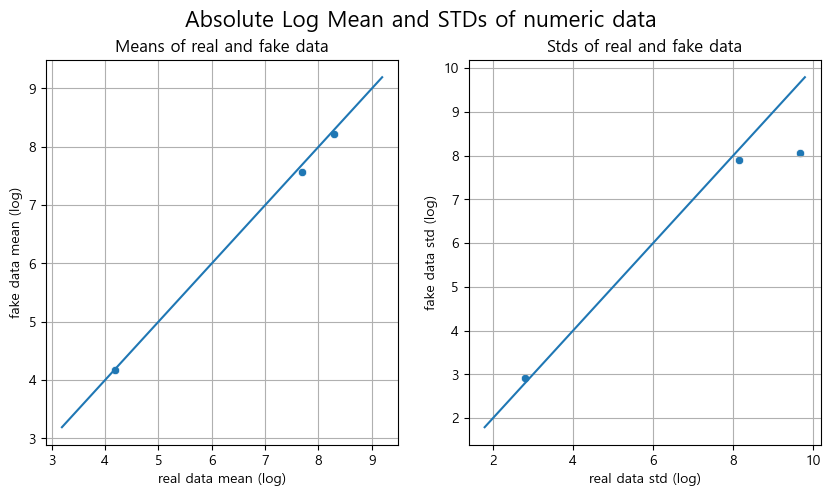

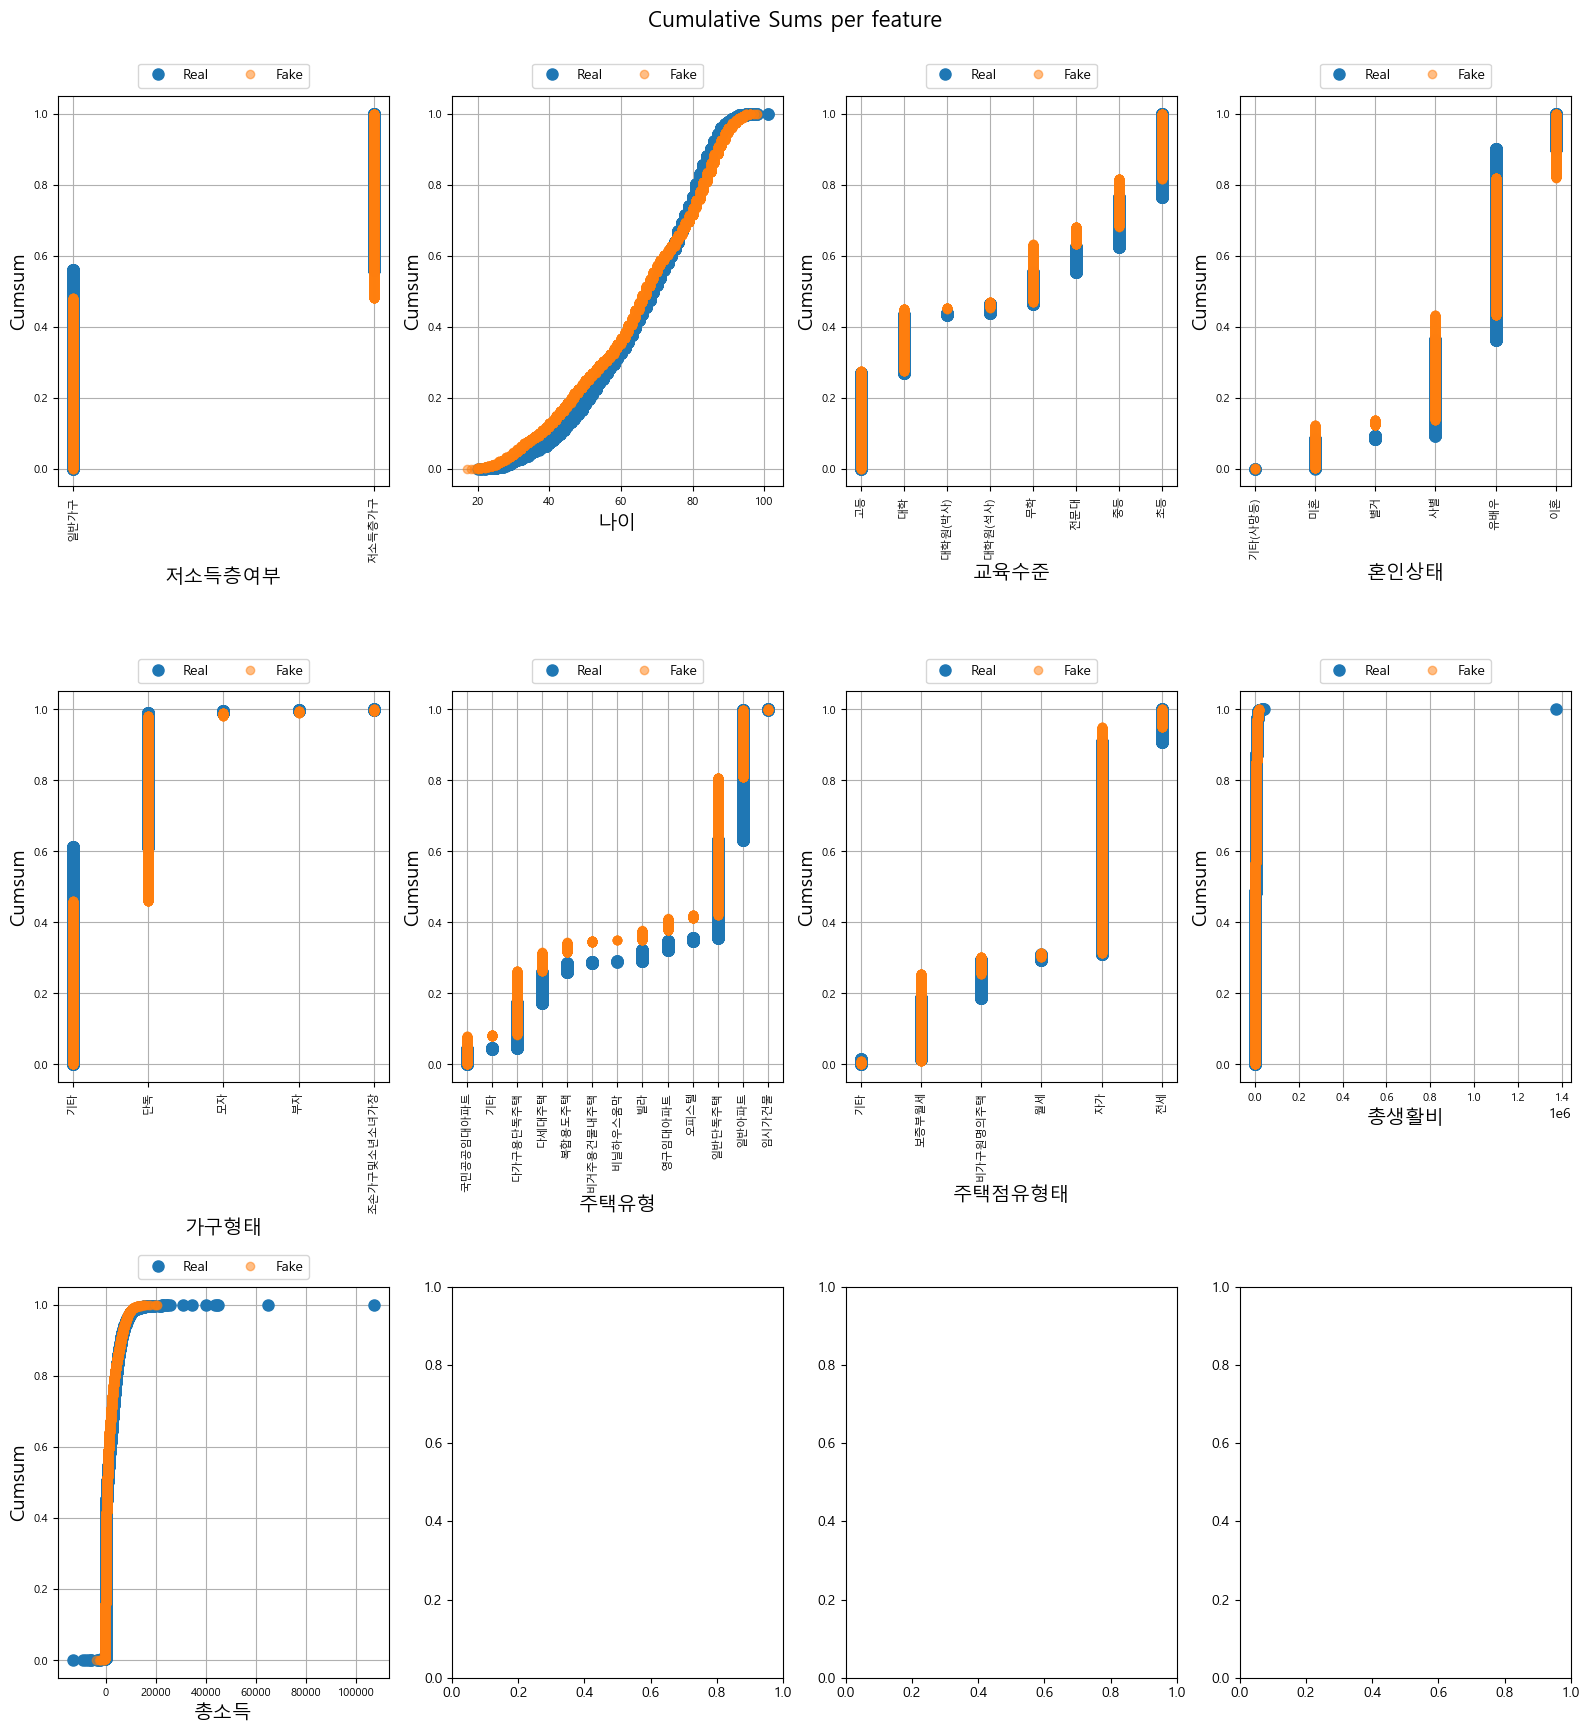

C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of tick

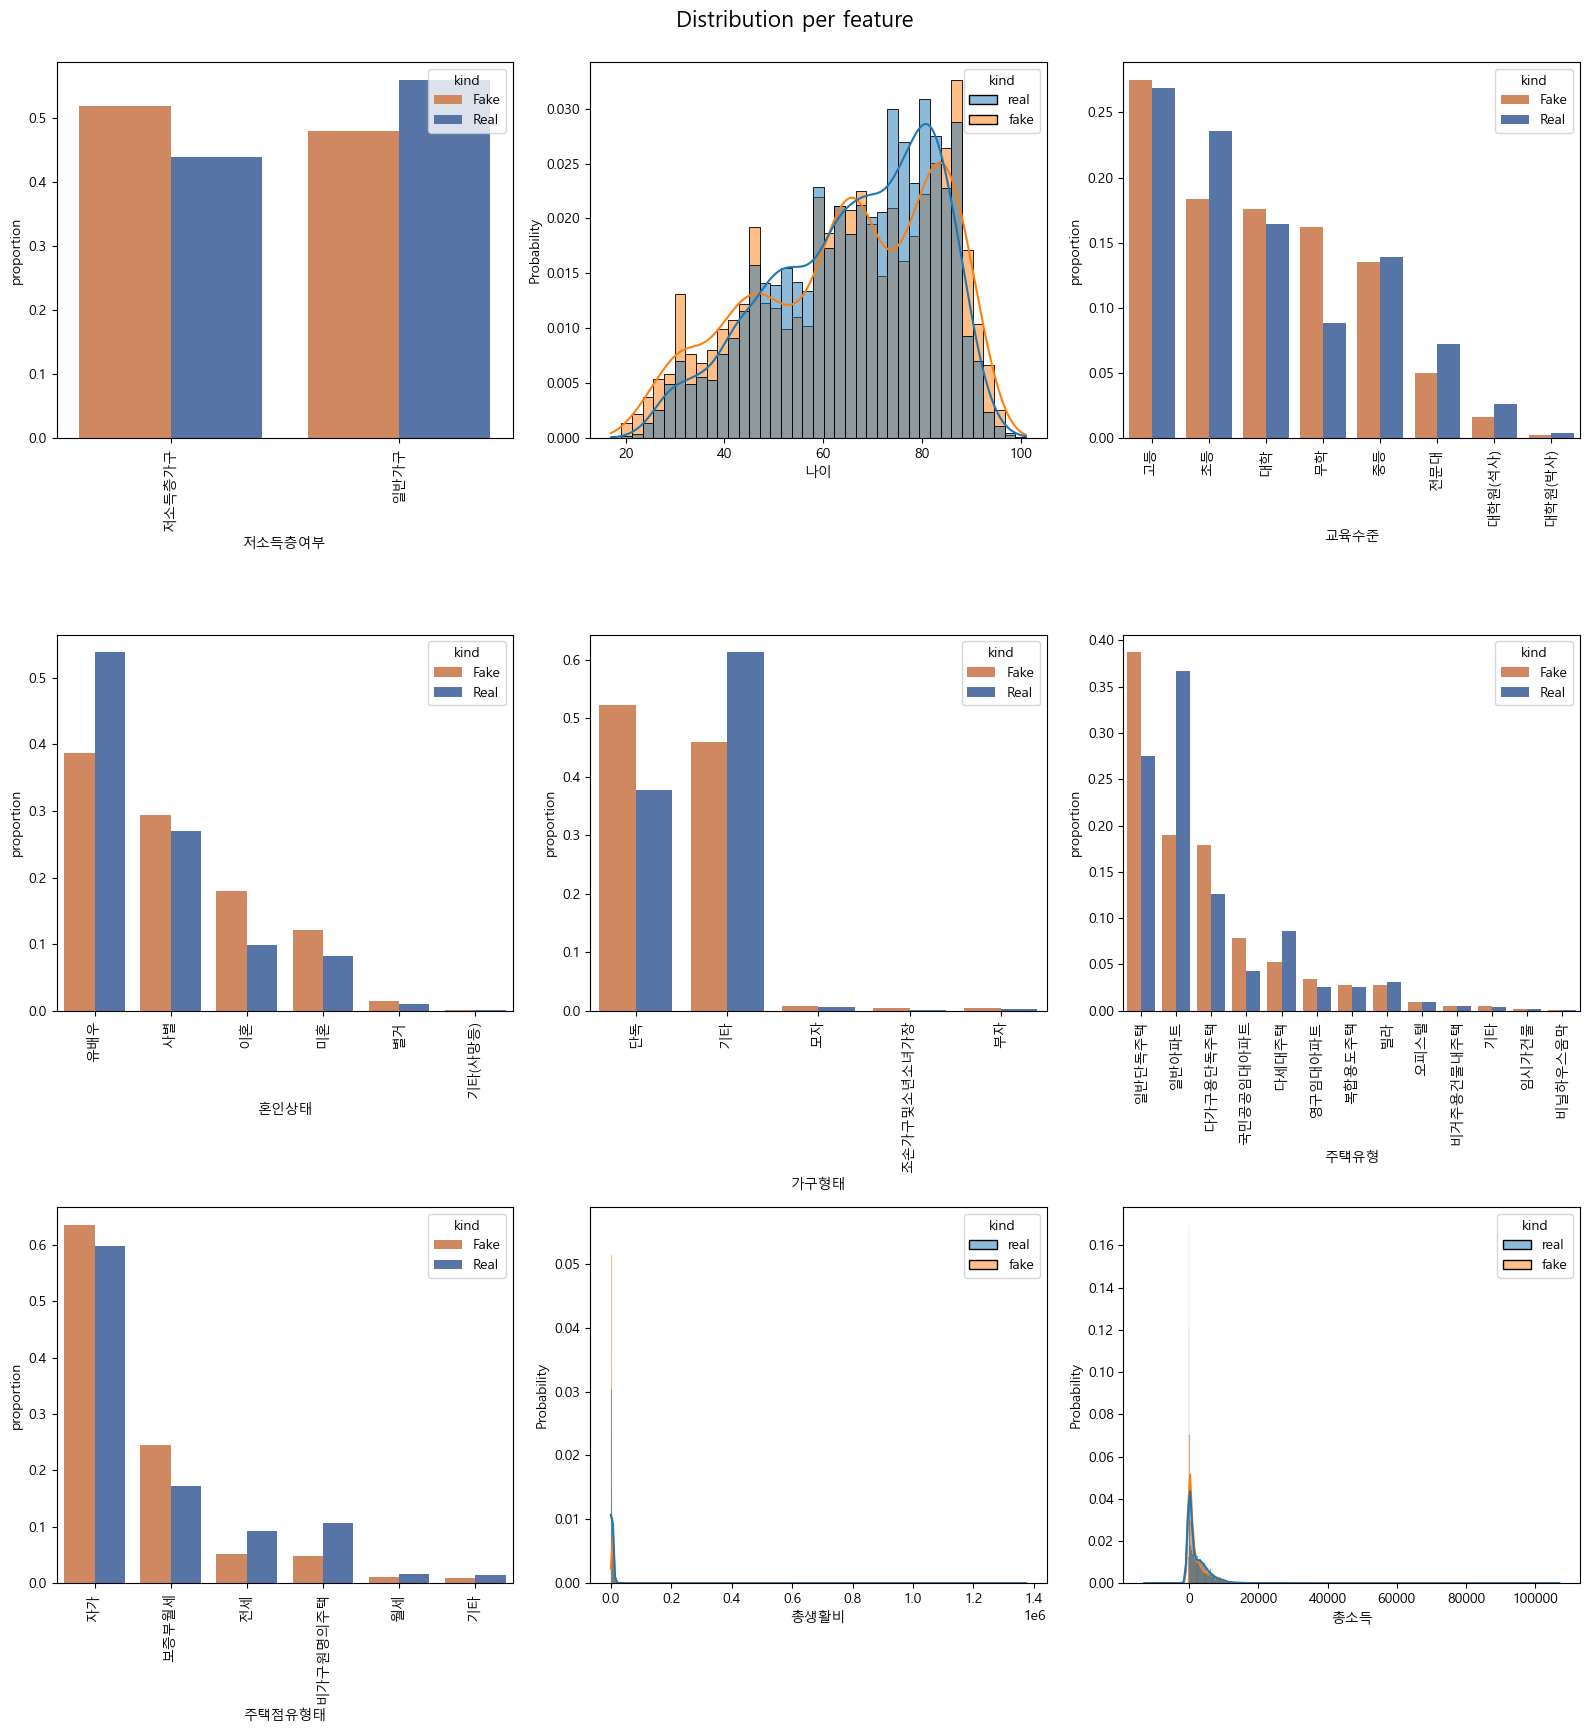

C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


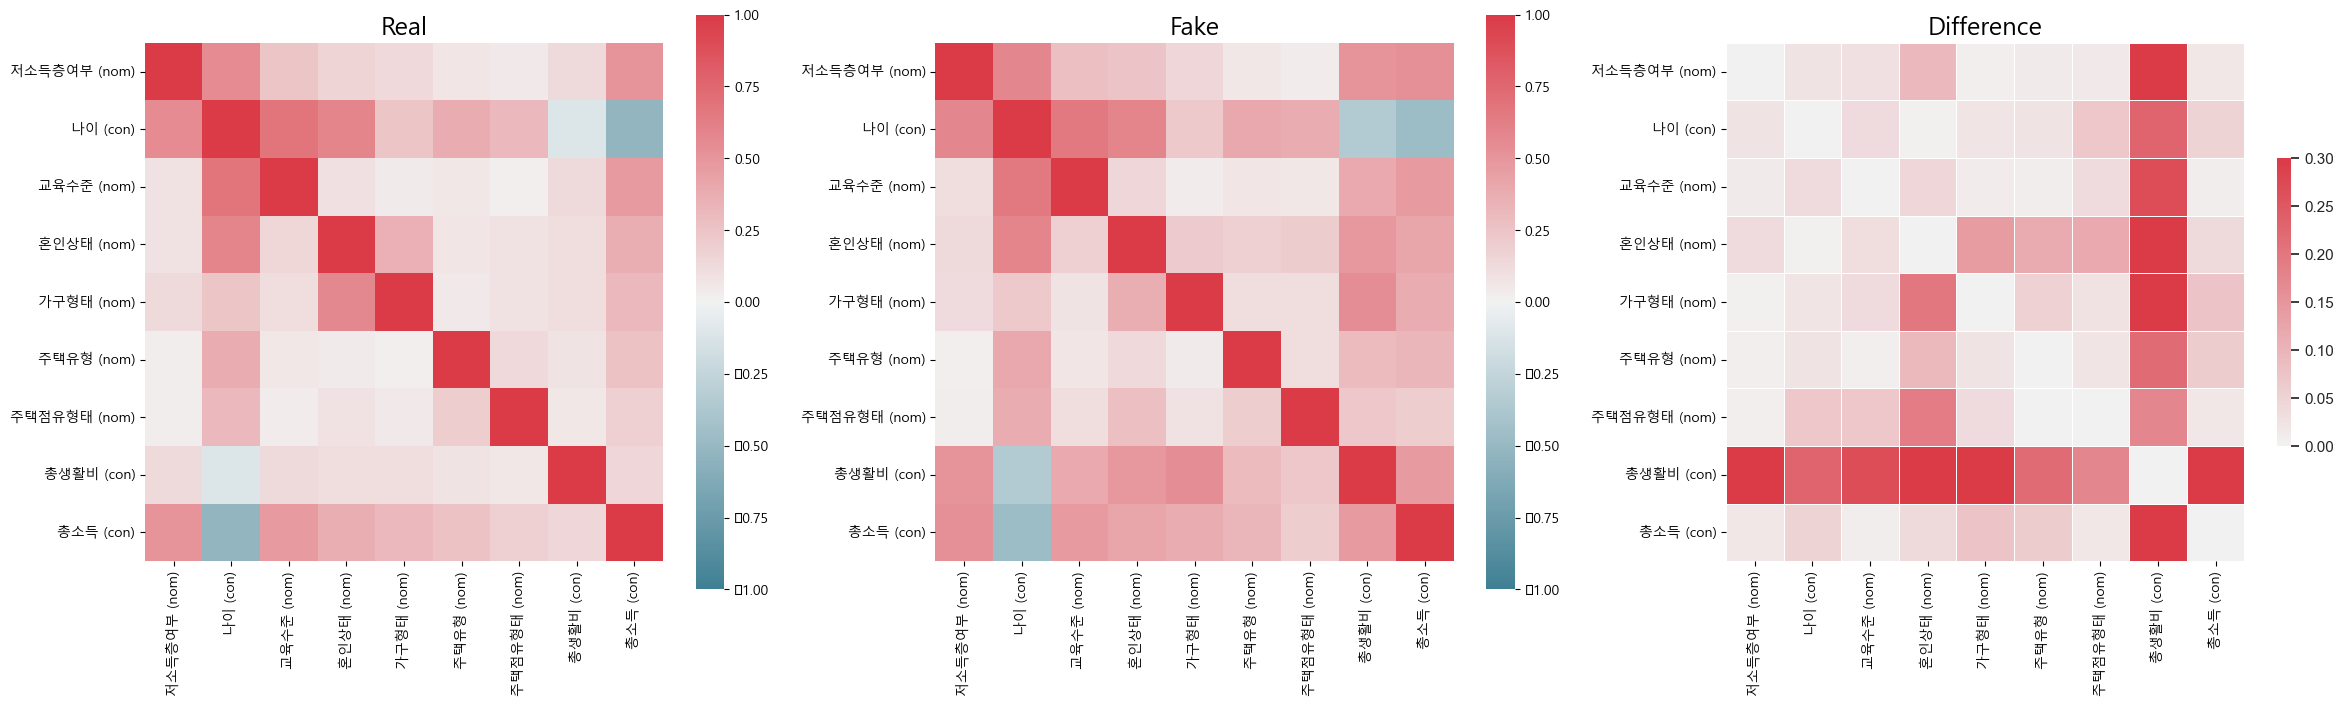

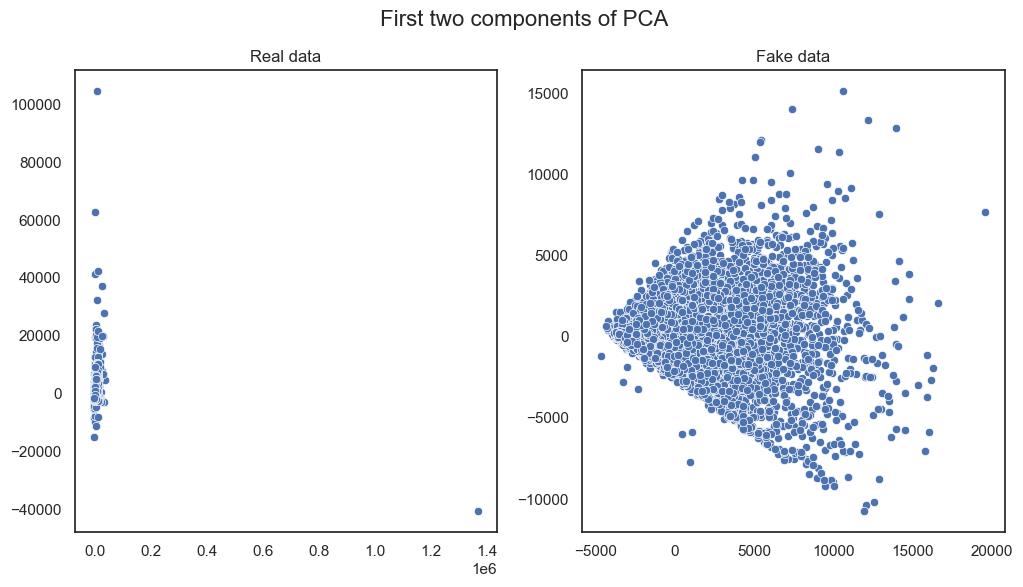

In [10]:
table_evaluator =  TableEvaluator(raw, synthetic_data, cat_cols= categorical_features)
table_evaluator.visual_evaluation()

In [11]:
from sdmetrics.reports.single_table import QualityReport

In [12]:
report = QualityReport()

In [13]:
metadata = {
    #"primary_key": "user_id",
    "columns": {
        "저소득층여부": {
            "sdtype": "object",
        },
        "나이": {
            "sdtype": "numerical"
        },
        "교육수준": {
            "sdtype": "categorical",
        }, 
        "혼인상태": {
            "sdtype": "categorical"
        },
        "가구형태": {
            "sdtype": "categorical"
        },
        "주택유형": {
            "sdtype": "categorical"
        },
        "주택점유형태": {
            "sdtype": "categorical"
        },
        "총생활비": {
            "sdtype": "numerical"
        },
        "총소득": {
            "sdtype": "numerical"
        }
    }
}

# 통계적 유사성

In [14]:
report.generate(raw, synthetic_data, metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|███████████████████████████████████████████| 36/36 [00:00<00:00, 51.21it/s]

Overall Quality Score: 77.19%

Properties:
- Column Shapes: 87.0%
- Column Pair Trends: 67.39%


# KStest and TVtest

In [15]:
report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,나이,KSComplement,0.939860
1,교육수준,TVComplement,0.909345
2,혼인상태,TVComplement,0.849587
3,가구형태,TVComplement,0.847171
4,주택유형,TVComplement,0.784870
5,주택점유형태,TVComplement,0.888620
6,총생활비,KSComplement,0.914177
7,총소득,KSComplement,0.826319


In [16]:
report.get_properties()

,Property,Score
0,Column Shapes,0.869994
1,Column Pair Trends,0.673880


# TCAP

In [17]:
from sdmetrics.single_table import CategoricalCAP

TCAP_score_1 = CategoricalCAP.compute(
    real_data=raw,
    synthetic_data=synthetic_data,
    key_fields=['나이'],
    sensitive_fields=['저소득층여부']
)

In [18]:
TCAP_score_1

0.3413680182561657

In [19]:
TCAP_score_2 = CategoricalCAP.compute(
    real_data=raw,
    synthetic_data=synthetic_data,
    key_fields=['나이'],
    sensitive_fields=['저소득층여부', '총소득']
)

In [20]:
TCAP_score_2

0.9995410407858812

# pMSE

In [21]:
def pMSE(real, fake):
    
    real['target'] = 0
    fake['target'] = 1

    merge = pd.concat([real, fake])
    # 학습데이터, taget 분리
    X = merge.drop(['target'], axis = 1)
    Y = merge['target']

    # 범주형 변수 One-hot Encoding, 수치형 변수는 Scaling
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import OneHotEncoder

    cate_X = merge[['저소득층여부','교육수준','혼인상태','가구형태','주택유형','주택점유형태','가구서비스','노인서비스','아동서비스']]
    conti_X = merge[['나이','총생활비','총소득']]

    cate_X_dummy=pd.get_dummies(cate_X)

    scaler_X=StandardScaler()
    conti_X_st=scaler_X.fit_transform(conti_X)

    conti_X_st=pd.DataFrame(conti_X_st, columns=conti_X.columns)

    cate_X_dummy.reset_index(inplace=True, drop=True)
    conti_X_st.reset_index(inplace=True, drop=True)
    Y.reset_index(inplace=True, drop=True)

    # train set
    train_set=pd.concat([conti_X_st,cate_X_dummy, Y], axis=1)
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    
    #Logistic Reggression
    model_log = LogisticRegression(penalty = 'l2', solver='saga', random_state=0) 
    model_log.fit(train_set, Y) # 모델 학습

    y_pred= model_log.predict_proba(train_set) # 예측 라벨

    s = 0
    n0 = len(real)
    n1 = len(fake)
    for score in y_pred:
        s+= (score[0] - (n1/(n0+n1)))**2

    pMSE_logistic = s*(1/(n0+n1))

    #RandomForest
    model_rf = RandomForestClassifier(random_state=0) 
    model_rf.fit(train_set, Y) # 모델 학습

    y_pred= model_rf.predict_proba(train_set) # 예측 라벨

    s = 0
    n0 = len(real)
    n1 = len(fake)
    for score in y_pred:
        s+= (score[0] - (n1/(n0+n1)))**2

    pMSE_rf = s*(1/(n0+n1))

    #SVM
    model_svc = SVC(kernel = 'rbf', probability=True)
    model_svc.fit(train_set, Y) # 모델 학습

    y_pred= model_svc.predict_proba(train_set) # 예측 라벨

    s = 0
    n0 = len(real)
    n1 = len(fake)
    for score in y_pred:
        s+= (score[0] - (n1/(n0+n1)))**2

    pMSE_svm = s*(1/(n0+n1))

    #3가지 분류기 평균값 도출
    pMSE = (pMSE_logistic + pMSE_rf + pMSE_svm)/3
    
    return pMSE

In [22]:
ctgan_pMSE = pMSE(raw, synthetic_data)

ctgan_pMSE

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.24103232750996814